# Google drive

In [1]:
# Cargar google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerias

In [4]:
import pandas as pd
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Carga de datos

In [2]:
# Definir las posibles ubicaciones
locations = ["Dataset/", "/content/drive/MyDrive/SistemaRecomendación/Dataset"]

# Función para cargar un archivo desde una de las ubicaciones
def load_csv(filename):
    for location in locations:
        filepath = os.path.join(location, filename)
        if os.path.exists(filepath):
            return pd.read_csv(filepath)
    raise FileNotFoundError(f"No se encontró el archivo {filename} en las ubicaciones especificadas.")

# Cargar los archivos
aisles = load_csv("Aisles.csv")
departments = load_csv("departments.csv")
order_products_prior = load_csv("order_products__prior.csv")
order_products_train = load_csv("order_products__train.csv")
orders = load_csv("orders.csv")
products = load_csv("products.csv")

print("Archivos cargados correctamente.")


Archivos cargados correctamente.


# Primer analisis

Tabla aisles

In [4]:
print(aisles.head())
print(aisles.shape)
print(" ")
print("Información:")
aisles.info()
print(" ")
print("Descripción:")
aisles.describe()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
(134, 2)
 
Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
 
Descripción:


,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


Departments

In [5]:
print(departments.head())
print(departments.shape)
print(" ")
print("Información:")
departments.info()
print(" ")
print("Descripción:")
departments.describe()

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
(21, 2)
 
Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
 
Descripción:


,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


Order_products_prior

In [ ]:
print(order_products_prior.head())
print(order_products_prior.shape)
print(" ")
print("Información:")
order_products_prior.info()
print(" ")
print("Descripción:")
order_products_prior.describe()

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
(32434489, 4)
 
Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB
 
Descripción:


,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


Order_products_train

In [ ]:
print(order_products_train.head())
print(order_products_train.shape)
print(" ")
print("Información:")
order_products_train.info()
print(" ")
print("Descripción:")
order_products_train.describe()

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
(1384617, 4)
 
Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB
 
Descripción:


,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


Orders

In [ ]:
print(orders.head())
print(orders.shape)
print(" ")
print("Información:")
orders.info()
print(" ")
print("Descripción:")
orders.describe()

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
(3421083, 7)
 
Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   or

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


Products

In [ ]:
print(products.head())
print(products.shape)
print(" ")
print("Información:")
products.info()
print(" ")
print("Descripción:")
products.describe()

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
(49688, 4)
 
Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


# Nulos y duplicados

In [ ]:
print("aisles")
print (" ")
print ("Nulos:")
nulls = aisles.isnull().sum()
print(nulls)
print (" ")
print ("Duplicados:")
duplicates = aisles.duplicated().sum()
print(duplicates)

aisles
 
Nulos:
aisle_id    0
aisle       0
dtype: int64
 
Duplicados:
0


In [ ]:
print("departments")
print (" ")
print ("Nulos:")
nulls = departments.isnull().sum()
print(nulls)
print (" ")
print ("Duplicados:")
duplicates = departments.duplicated().sum()
print(duplicates)

departments
 
Nulos:
department_id    0
department       0
dtype: int64
 
Duplicados:
0


In [ ]:
print("order_products_prior")
print (" ")
print ("Nulos:")
nulls = order_products_prior.isnull().sum()
print(nulls)
print (" ")
print ("Duplicados:")
duplicates = order_products_prior.duplicated().sum()
print(duplicates)

order_products_prior
 
Nulos:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
 
Duplicados:
0


In [ ]:
print ("order_products_train")
print (" ")
print ("Nulos:")
nulls = order_products_train.isnull().sum()
print(nulls)
print (" ")
print ("Duplicados:")
duplicates = order_products_train.duplicated().sum()
print(duplicates)

order_products_train
 
Nulos:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
 
Duplicados:
0


In [ ]:
print ("orders")
print (" ")
print ("Nulos:")
nulls = orders.isnull().sum()
print(nulls)
print (" ")
print ("Duplicados:")
duplicates = orders.duplicated().sum()
print(duplicates)

orders
 
Nulos:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
 
Duplicados:
0


In [ ]:
# Limpieza de datos nulos en orders
def limpiar_orders(file_path):
    df = pd.read_csv(file_path)

    # Identificar usuarios con al menos un NaN y al menos un 0 en 'days_since_prior_order'
    usuarios_con_null_y_cero = df.groupby('user_id')['days_since_prior_order'].apply(lambda x: x.isna().any() and (0 in x.values))
    usuarios_a_eliminar = usuarios_con_null_y_cero[usuarios_con_null_y_cero].index

    # Eliminar registros NaN para estos usuarios
    df = df[~((df['user_id'].isin(usuarios_a_eliminar)) & (df['days_since_prior_order'].isna()))]

    # Identificar usuarios que tienen solo un NaN y ningún otro registro
    usuarios_solo_null = df[df['days_since_prior_order'].isna()].groupby('user_id').size()
    usuarios_unico_null = usuarios_solo_null[usuarios_solo_null == 1].index

    # Reemplazar NaN por 0 para estos usuarios
    df.loc[(df['user_id'].isin(usuarios_unico_null)) & (df['days_since_prior_order'].isna()), 'days_since_prior_order'] = 0

    # Identificar usuarios con al menos un NaN y más registros pero sin ningún 0
    usuarios_con_null_sin_cero = df.groupby('user_id')['days_since_prior_order'].apply(lambda x: x.isna().any() and (0 not in x.values))
    usuarios_a_reemplazar = usuarios_con_null_sin_cero[usuarios_con_null_sin_cero].index

    # Reemplazar NaN por 0 para estos usuarios
    df.loc[(df['user_id'].isin(usuarios_a_reemplazar)) & (df['days_since_prior_order'].isna()), 'days_since_prior_order'] = 0

    return df

# Ruta del archivo CSV
file_path = "Dataset\orders.csv"  # Asegúrate de cambiar esto si el archivo está en otra ubicación

# Procesar los datos
df_procesado = limpiar_orders(file_path)

# Guardar el resultado en un nuevo archivo
output_file = "orders_cleaned.csv"
df_procesado.to_csv(output_file, index=False)

print(f"Archivo procesado guardado en {output_file}")



Archivo procesado guardado en orders_cleaned.csv


In [ ]:
orders_cleaned = pd.read_csv('orders_cleaned.csv')
nulls = orders_cleaned.isnull().sum()
print(nulls)

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [ ]:
print ("products")
print (" ")
print ("Nulos:")
nulls = products.isnull().sum()
print(nulls)
print (" ")
print ("Duplicados:")
duplicates = products.duplicated().sum()
print(duplicates)

products
 
Nulos:
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
 
Duplicados:
0


# Graficas

      Departamento  Cantidad de Compras
0          produce              9479291
1       dairy eggs              5414016
2           snacks              2887550
3        beverages              2690129
4           frozen              2236432
5           pantry              1875577
6           bakery              1176787
7     canned goods              1068058
8             deli              1051249
9  dry goods pasta               866627


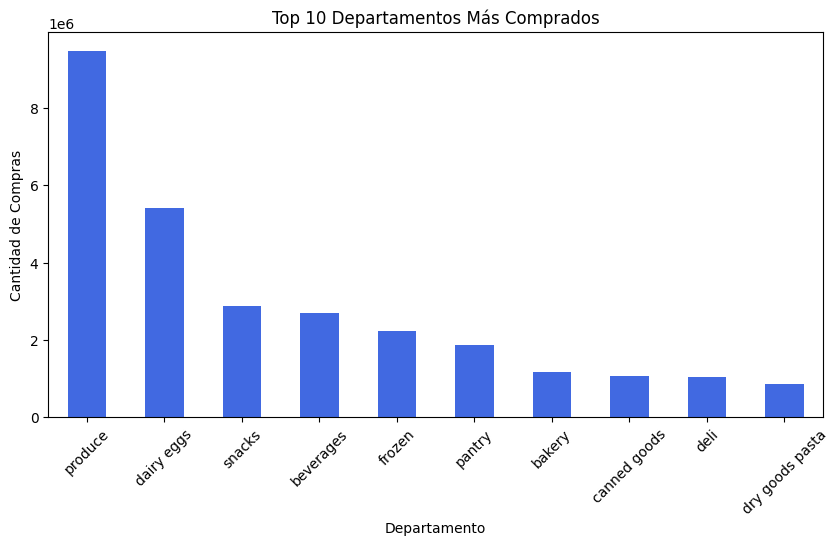

In [ ]:
# Unir productos con departamentos
df_products = products.merge(departments, on="department_id", how="left")

# Unir pedidos con productos para obtener los departamentos
df_merged = order_products_prior.merge(df_products[['product_id', 'department']], on="product_id", how="left")

# Contar la cantidad de compras por departamento
top_departments = df_merged["department"].value_counts().head(10)

# Convertir en DataFrame para mostrar en tabla
top_departments_df = top_departments.reset_index()
top_departments_df.columns = ["Departamento", "Cantidad de Compras"]

# Mostrar tabla
print(top_departments_df)

# Graficar los departamentos más usados
plt.figure(figsize=(10, 5))
top_departments.plot(kind="bar", color="royalblue")
plt.xlabel("Departamento")
plt.ylabel("Cantidad de Compras")
plt.title("Top 10 Departamentos Más Comprados")
plt.xticks(rotation=45)
plt.show()

                         Pasillo  Cantidad de Compras
0                   fresh fruits              3642188
1               fresh vegetables              3418021
2     packaged vegetables fruits              1765313
3                         yogurt              1452343
4                packaged cheese               979763
5                           milk               891015
6  water seltzer sparkling water               841533
7                 chips pretzels               722470
8                soy lactosefree               638253
9                          bread               584834


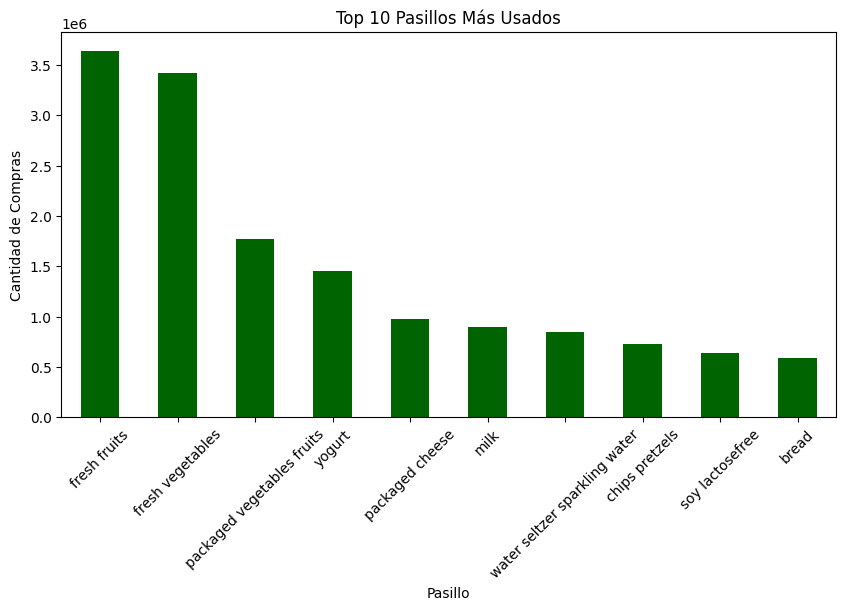

In [ ]:
# Unir productos con pasillos
df_products = df_products.merge(aisles, on="aisle_id", how="left")

# Unir pedidos con productos para obtener los pasillos
df_merged = order_products_prior.merge(df_products[['product_id', 'aisle']], on="product_id", how="left")

# Contar la cantidad de compras por pasillo
top_aisles = df_merged["aisle"].value_counts().head(10)

# Convertir en DataFrame para mostrar en tabla
top_aisles_df = top_aisles.reset_index()
top_aisles_df.columns = ["Pasillo", "Cantidad de Compras"]

# Mostrar tabla
print(top_aisles_df)

# Graficar los pasillos más usados
plt.figure(figsize=(10, 5))
top_aisles.plot(kind="bar", color="darkgreen")
plt.xlabel("Pasillo")
plt.ylabel("Cantidad de Compras")
plt.title("Top 10 Pasillos Más Usados")
plt.xticks(rotation=45)
plt.show()

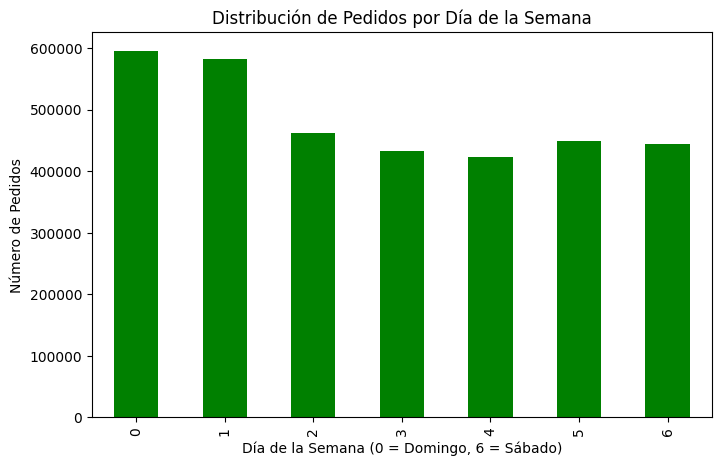

In [ ]:
# Graficar el número de pedidos por día de la semana
plt.figure(figsize=(8, 5))
orders_cleaned['order_dow'].value_counts().sort_index().plot(kind="bar", color="green")

plt.xlabel("Día de la Semana (0 = Domingo, 6 = Sábado)")
plt.ylabel("Número de Pedidos")
plt.title("Distribución de Pedidos por Día de la Semana")
plt.show()

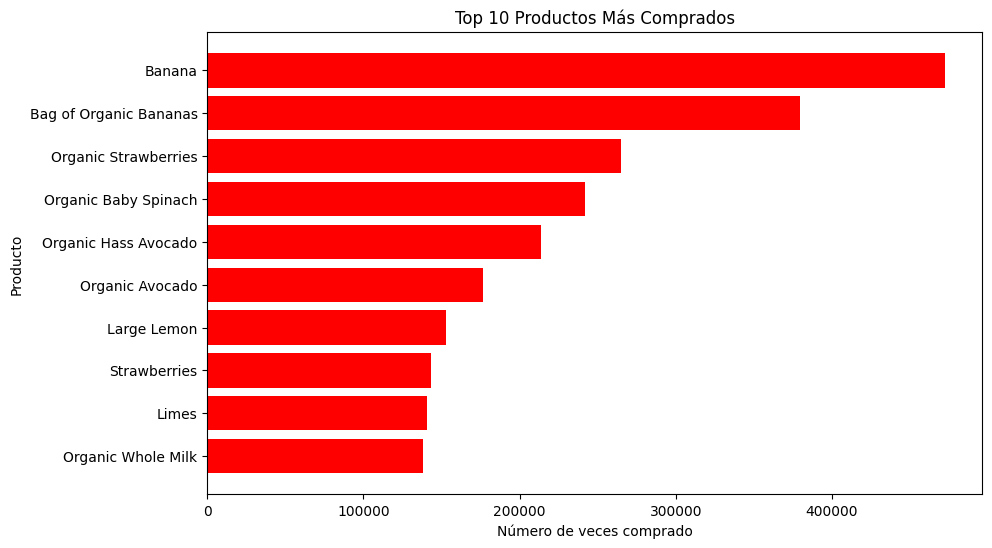

In [ ]:
# Contar los 10 productos más comprados
top_products = order_products_prior	['product_id'].value_counts().head(10)

# Unir con los nombres de productos
top_products = top_products.rename_axis('product_id').reset_index(name='count')
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Grafica
plt.figure(figsize=(10, 6))
plt.barh(top_products['product_name'], top_products['count'], color="red")
plt.xlabel("Número de veces comprado")
plt.ylabel("Producto")
plt.title("Top 10 Productos Más Comprados")
plt.gca().invert_yaxis()  # Invierte el eje para que el más comprado esté arriba
plt.show()


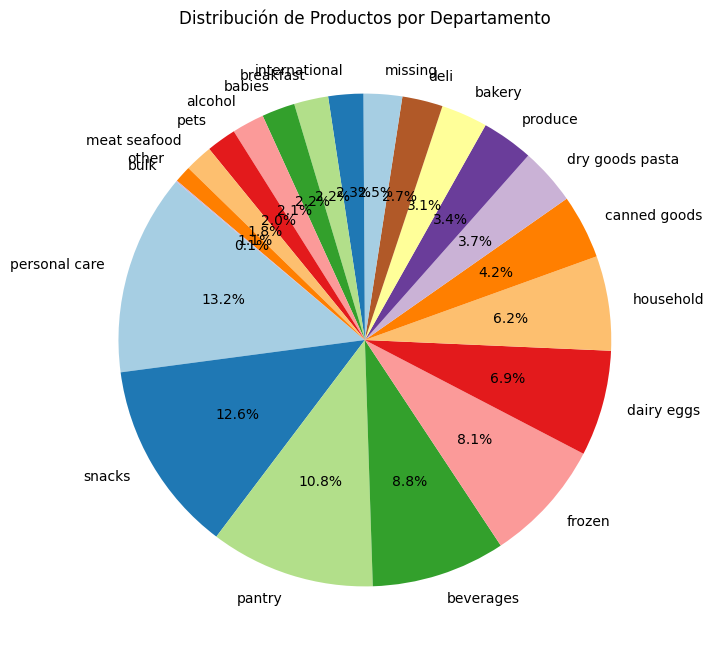

In [ ]:
# Contar productos por departamento
dept_counts = products['department_id'].value_counts().rename_axis('department_id').reset_index(name='count')
dept_counts = dept_counts.merge(departments, on="department_id")

# Grafica
plt.figure(figsize=(8, 8))
plt.pie(dept_counts["count"], labels=dept_counts["department"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribución de Productos por Departamento")
plt.show()

# Creación BBDD

In [ ]:
# Diccionario con nombres de las tablas y archivos CSV
csv_files = {
    "departments": "Dataset\departments.csv",
    "aisles": "Dataset\Aisles.csv",
    "products": "Dataset\products.csv",
    "orders": "Dataset\orders_cleaned.csv",
    "order_products_prior": "Dataset\order_products__prior.csv",
    "order_products_train": "Dataset\order_products__train.csv"
}

In [ ]:
db_path = 'Dataset/Instacart.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [ ]:
# Crear las tablas siguiendo el mismo formato que dates
cursor.execute('''
    CREATE TABLE IF NOT EXISTS departments (
        department_id INTEGER PRIMARY KEY,
        department TEXT NOT NULL
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS aisles (
        aisle_id INTEGER PRIMARY KEY,
        aisle TEXT NOT NULL
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS products (
        product_id INTEGER PRIMARY KEY,
        product_name TEXT NOT NULL,
        aisle_id INTEGER,
        department_id INTEGER,
        FOREIGN KEY (aisle_id) REFERENCES aisles(aisle_id),
        FOREIGN KEY (department_id) REFERENCES departments(department_id)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS orders (
        order_id INTEGER PRIMARY KEY,
        user_id INTEGER NOT NULL,
        eval_set TEXT,
        order_number INTEGER,
        order_dow INTEGER,
        order_hour_of_day INTEGER,
        days_since_prior_order REAL
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS order_products_prior (
        order_id INTEGER,
        product_id INTEGER,
        add_to_cart_order INTEGER,
        reordered BOOLEAN,
        PRIMARY KEY (order_id, product_id),
        FOREIGN KEY (order_id) REFERENCES orders(order_id),
        FOREIGN KEY (product_id) REFERENCES products(product_id)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS order_products_train (
        order_id INTEGER,
        product_id INTEGER,
        add_to_cart_order INTEGER,
        reordered BOOLEAN,
        PRIMARY KEY (order_id, product_id),
        FOREIGN KEY (order_id) REFERENCES orders(order_id),
        FOREIGN KEY (product_id) REFERENCES products(product_id)
    )
''')

In [ ]:
# Función para cargar datos desde CSV a SQLite
def load_data(table_name, file_name):
    try:
        df = pd.read_csv(file_name)
        df.to_sql(table_name, conn, if_exists="append", index=False)
        print(f"Datos insertados en {table_name} desde {file_name}.")
    except Exception as e:
        print(f"Error al insertar datos en {table_name}: {e}")

# Cargar datos en cada tabla
for table, file in csv_files.items():
    load_data(table, file)

# Cerrar la conexión
conn.close()
print("Base de datos creada y datos insertados con éxito.")

Datos insertados en departments desde Dataset\departments.csv.
Datos insertados en aisles desde Dataset\Aisles.csv.
Datos insertados en products desde Dataset\products.csv.
Datos insertados en orders desde Dataset\orders_cleaned.csv.
Datos insertados en order_products_prior desde Dataset\order_products__prior.csv.
Datos insertados en order_products_train desde Dataset\order_products__train.csv.
Base de datos creada y datos insertados con éxito.


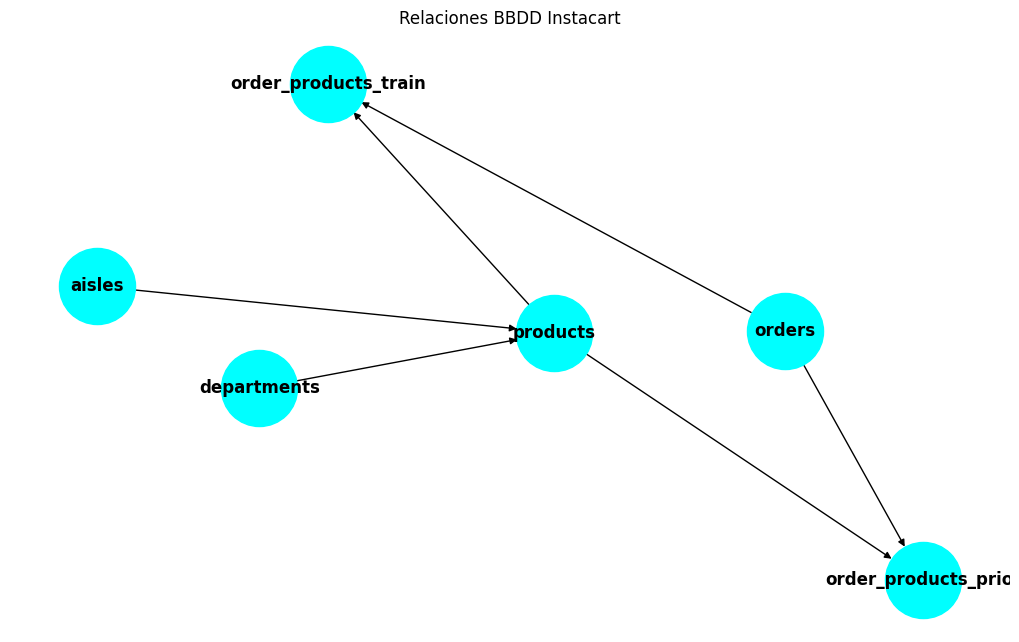

In [ ]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos (tablas)
tables = ['departments', 'aisles', 'products', 'orders', 'order_products_prior', 'order_products_train']
G.add_nodes_from(tables)

# Agregar relaciones (edges)
relationships = [
    ('aisles', 'products'),               # 'aisles' se relaciona con 'products' (aisle_id)
    ('departments', 'products'),          # 'departments' se relaciona con 'products' (department_id)
    ('products', 'order_products_prior'), # 'products' se relaciona con 'order_products_prior' (product_id)
    ('products', 'order_products_train'), # 'products' se relaciona con 'order_products_train' (product_id)
    ('orders', 'order_products_prior'),   # 'orders' se relaciona con 'order_products_prior' (order_id)
    ('orders', 'order_products_train')    # 'orders' se relaciona con 'order_products_train' (order_id)
]

G.add_edges_from(relationships)

# Dibuja el grafo
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Layout para el gráfico
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='cyan', font_size=12, font_weight='bold', arrows=True)
plt.title("Relaciones BBDD Instacart")
plt.show()

# Consulta BBDD

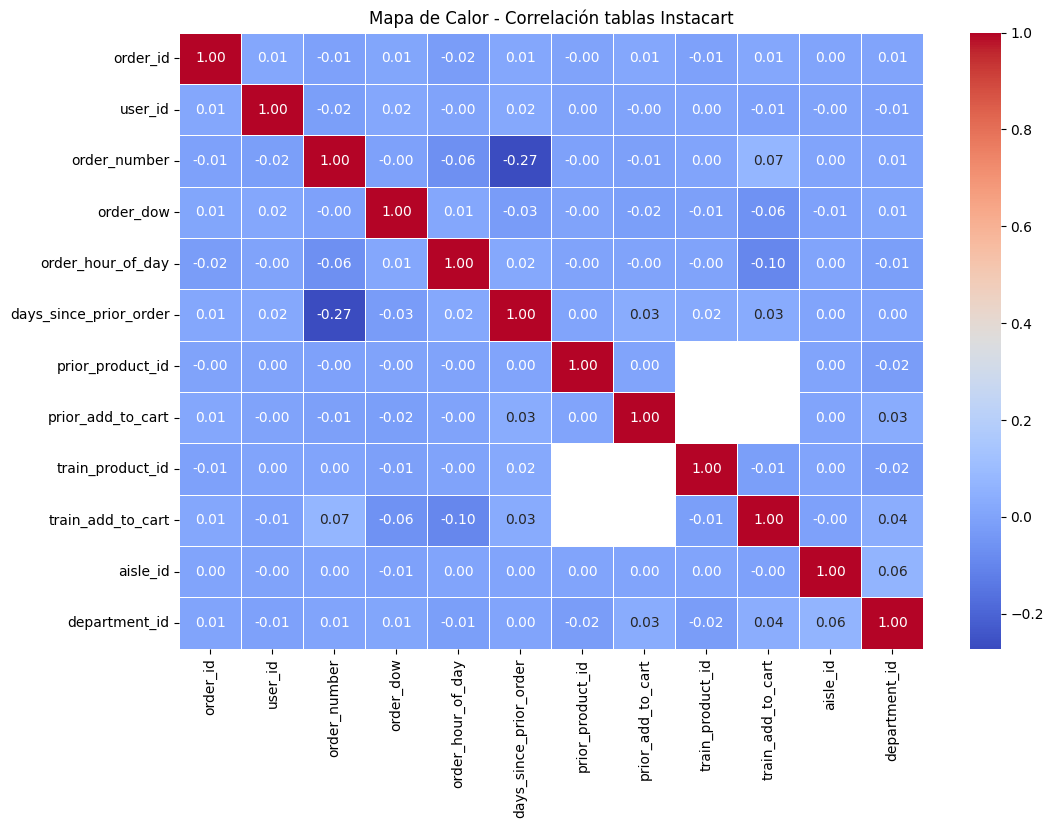

In [10]:
# Conectar a la base de datos
db_path = 'Dataset/Instacart.db'
conn = sqlite3.connect(db_path)

# Consulta SQL para unir varias tablas
query = """
SELECT
    o.order_id, o.user_id, o.order_number, o.order_dow, o.order_hour_of_day, o.days_since_prior_order,
    op_prior.product_id AS prior_product_id, op_prior.add_to_cart_order AS prior_add_to_cart,
    op_train.product_id AS train_product_id, op_train.add_to_cart_order AS train_add_to_cart,
    p.aisle_id, p.department_id
FROM orders o
LEFT JOIN order_products_prior op_prior ON o.order_id = op_prior.order_id
LEFT JOIN order_products_train op_train ON o.order_id = op_train.order_id
LEFT JOIN products p ON (op_prior.product_id = p.product_id OR op_train.product_id = p.product_id)
LIMIT 100000;  -- Reduce la cantidad de filas
"""

# Cargar los datos en un DataFrame con limitación para evitar sobrecarga de memoria
df = pd.read_sql(query, conn)

# Cerrar la conexión
conn.close()

# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Dibujar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Configurar título
plt.title("Mapa de Calor - Correlación tablas Instacart")
plt.show()


In [3]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect("Dataset/Instacart.db")

# 1️⃣ Total de usuarios y sample
total_users = pd.read_sql_query("SELECT COUNT(DISTINCT user_id) as total FROM orders", conn)["total"].iloc[0]
sample_size = int(total_users * 0.01)

print(f"📦 Total de usuarios: {total_users}")
print(f"🎯 Seleccionando el 1%: {sample_size} usuarios")

# 2️⃣ Seleccionar 1% de usuarios
sample_users = pd.read_sql_query(f"""
    SELECT DISTINCT user_id FROM orders
    ORDER BY RANDOM()
    LIMIT {sample_size};
""", conn)

# 3️⃣ Pedidos de esos usuarios
user_ids_str = ",".join(str(uid) for uid in sample_users["user_id"])
sample_orders = pd.read_sql_query(f"""
    SELECT * FROM orders
    WHERE user_id IN ({user_ids_str});
""", conn)

# 4️⃣ Obtener order_ids
order_ids = sample_orders["order_id"].tolist()

# 5️⃣ Dividir en bloques pequeños
def fetch_order_products_in_batches(ids, batch_size=500):
    all_chunks = []
    for i in range(0, len(ids), batch_size):
        chunk = ids[i:i+batch_size]
        placeholders = ",".join("?" * len(chunk))
        query = f"SELECT * FROM order_products_prior WHERE order_id IN ({placeholders})"
        chunk_data = pd.read_sql_query(query, conn, params=chunk)
        all_chunks.append(chunk_data)
    return pd.concat(all_chunks, ignore_index=True)

order_products_prior = fetch_order_products_in_batches(order_ids)

# 6️⃣ Cargar catálogos
products = pd.read_sql_query("SELECT * FROM products", conn)
aisles = pd.read_sql_query("SELECT * FROM aisles", conn)
departments = pd.read_sql_query("SELECT * FROM departments", conn)

# ✅ Verificación
print(f"Usuarios cargados: {len(sample_users)}")
print(f"Pedidos cargados: {len(sample_orders)}")
print(f"order_products_prior cargados: {len(order_products_prior)}")

📦 Total de usuarios: 206209
🎯 Seleccionando el 1%: 2062 usuarios
Usuarios cargados: 2062
Pedidos cargados: 34158
order_products_prior cargados: 330770


Segmentacion (K-Means)

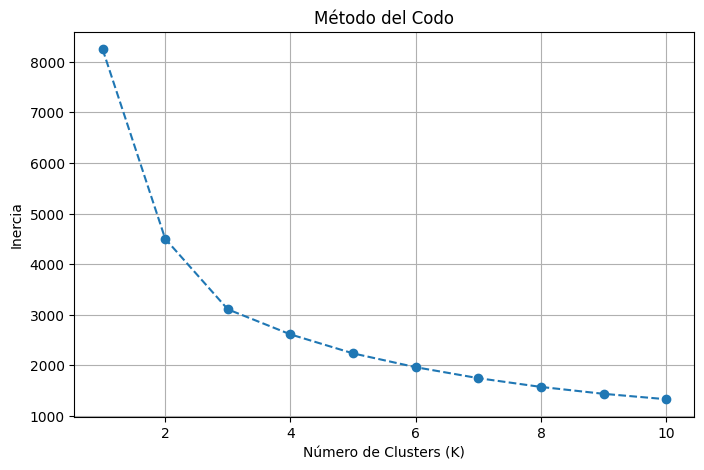

segment
3    735
0    677
2    402
1    248
Name: count, dtype: int64


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear características por usuario
user_features = sample_orders.groupby("user_id").agg({
    "days_since_prior_order": ["mean", "std"],
    "order_number": "max"
}).fillna(0)

user_features.columns = ["mean_days", "std_days", "total_orders"]

# Número de productos distintos comprados
productos_por_usuario = order_products_prior.merge(sample_orders[["order_id", "user_id"]], on="order_id")
unique_products = productos_por_usuario.groupby("user_id")["product_id"].nunique()
user_features["unique_products"] = unique_products

# Rellenar posibles nulos
user_features.fillna(0, inplace=True)

# Normalización
scaler = StandardScaler()
user_scaled = scaler.fit_transform(user_features)

# 🔹 Método del Codo para elegir el número óptimo de clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(user_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

# 🔹 Aplicar KMeans con el número elegido (por ejemplo, 4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
user_features["segment"] = kmeans.fit_predict(user_scaled)

# Ver la distribución de segmentos
print(user_features["segment"].value_counts())

# Guardar para futuras recomendaciones
user_segments = user_features.reset_index()[["user_id", "segment"]]




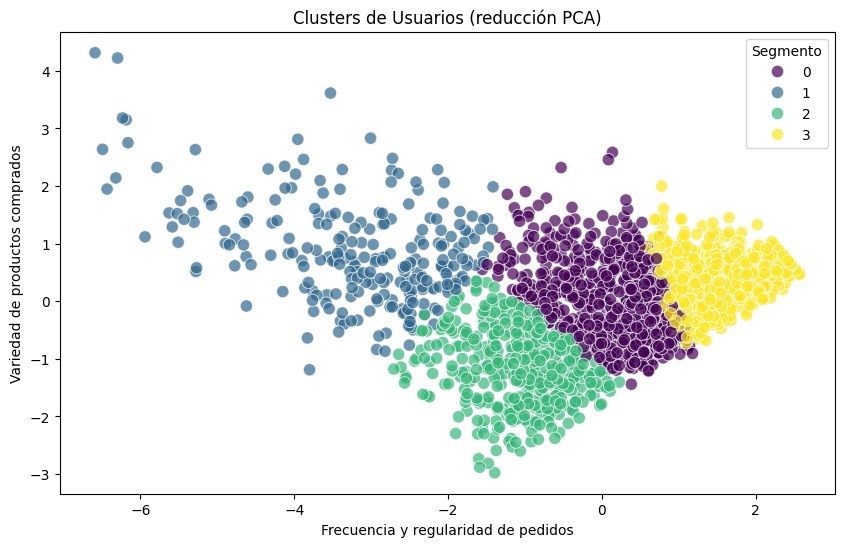

In [5]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
user_pca = pca.fit_transform(user_scaled)

# Convertimos a DataFrame para graficar
pca_df = pd.DataFrame(data=user_pca, columns=["PC1", "PC2"])
pca_df["segment"] = user_features["segment"].values

# Visualización en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="segment", palette="viridis", s=80, alpha=0.7)
plt.title("Clusters de Usuarios (reducción PCA)")
plt.xlabel("Frecuencia y regularidad de pedidos")
plt.ylabel("Variedad de productos comprados")
plt.legend(title="Segmento")
plt.show()


NLP

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorizar nombres de productos
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(products["product_name"])

# Función de búsqueda
def buscar_producto(query, top_n=10):
    query_vec = vectorizer.transform([query])
    similitudes = cosine_similarity(query_vec, tfidf_matrix).flatten()
    indices_top = similitudes.argsort()[-top_n:][::-1]
    return products.iloc[indices_top][["product_name"]]

SVD

In [7]:
from scipy.sparse.linalg import svds
import numpy as np

# 1️⃣ Crear matriz usuario-producto
user_product_matrix = productos_por_usuario.pivot_table(
    index='user_id',
    columns='product_id',
    values='reordered',
    fill_value=0
)

# 2️⃣ Convertir a matriz NumPy
user_product_matrix_np = user_product_matrix.values

# 3️⃣ Aplicar SVD
U, sigma, Vt = svds(user_product_matrix_np, k=15)

# 4️⃣ Convertir sigma a matriz diagonal
sigma = np.diag(sigma)

# 5️⃣ Predecir las compras estimadas
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# 6️⃣ Convertir a DataFrame con los mismos índices y columnas originales
preds_df = pd.DataFrame(
    all_user_predicted_ratings,
    columns=user_product_matrix.columns,
    index=user_product_matrix.index
)

print("✅ SVD aplicado y recomendaciones calculadas.")


✅ SVD aplicado y recomendaciones calculadas.


In [8]:
def recomendar_productos(user_id, n=5):
    if user_id not in preds_df.index:
        return "❌ Usuario no encontrado."

    user_row = preds_df.loc[user_id].sort_values(ascending=False)
    
    # Filtrar productos que el usuario NO ha comprado aún
    productos_ya_comprados = user_product_matrix.loc[user_id]
    productos_no_comprados = user_row[productos_ya_comprados == 0]

    # Obtener los top productos recomendados
    top_product_ids = productos_no_comprados.head(n).index
    return products[products["product_id"].isin(top_product_ids)][["product_id", "product_name"]]

In [9]:
user_ejemplo = user_product_matrix.index[2]  # o prueba con otro ID
print(f"🛒 Recomendaciones para el usuario {user_ejemplo}:\n")
print(recomendar_productos(user_ejemplo))

🛒 Recomendaciones para el usuario 368:

       product_id            product_name
13175       13176  Bag of Organic Bananas
16796       16797            Strawberries
21902       21903    Organic Baby Spinach
39274       39275     Organic Blueberries
43351       43352             Raspberries


Market Basket Analysis (Apriori)

In [10]:
# Importar librerías necesarias
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# ✅ Preparar datos para Apriori
# Agrupar productos por pedido (solo prior para análisis histórico)
basket = order_products_prior.groupby("order_id")["product_id"].apply(list)

# Convertir a lista de listas (formato transaccional)
transactions = basket.tolist()

# Codificar con TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 🔍 Aplicar algoritmo Apriori
# Generar itemsets frecuentes con soporte mínimo del 1%
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Mostrar los 10 conjuntos de productos más frecuentes
print("Itemsets frecuentes más comunes:")
display(frequent_itemsets.sort_values("support", ascending=False).head(10))

# 🔗 Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Mostrar las reglas más fuertes
print("Reglas de asociación más fuertes (ordenadas por lift):")
display(rules.sort_values("lift", ascending=False).head(10))


Itemsets frecuentes más comunes:


,support,itemsets
49,0.160425,(24852)
23,0.122321,(13176)
36,0.086989,(21137)
39,0.071193,(21903)
110,0.070663,(47209)
112,0.057484,(47766)
111,0.055552,(47626)
54,0.048293,(26209)
27,0.047514,(16797)
62,0.042030,(27966)


Reglas de asociación más fuertes (ordenadas por lift):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
35,(47626),(26209),0.055552,0.048293,0.011839,0.213124,4.413178,1.0,0.009157,1.209476,0.818897,0.128683,0.173195,0.229143
34,(26209),(47626),0.048293,0.055552,0.011839,0.245161,4.413178,1.0,0.009157,1.251192,0.812651,0.128683,0.200762,0.229143
14,(21137),(27966),0.086989,0.042030,0.011653,0.133954,3.187096,1.0,0.007996,1.106142,0.751617,0.099283,0.095957,0.205598
15,(27966),(21137),0.042030,0.086989,0.011653,0.277242,3.187096,1.0,0.007996,1.263233,0.716343,0.099283,0.208380,0.205598
21,(21903),(47766),0.071193,0.057484,0.010406,0.146171,2.542815,1.0,0.006314,1.103870,0.653241,0.087987,0.094096,0.163600
20,(47766),(21903),0.057484,0.071193,0.010406,0.181030,2.542815,1.0,0.006314,1.134116,0.643740,0.087987,0.118256,0.163600
24,(28204),(24852),0.031250,0.160425,0.012307,0.393819,2.454846,1.0,0.007294,1.385023,0.611760,0.068612,0.277990,0.235266
25,(24852),(28204),0.160425,0.031250,0.012307,0.076714,2.454846,1.0,0.007294,1.049241,0.705884,0.068612,0.046931,0.235266
4,(13176),(27966),0.122321,0.042030,0.011808,0.096536,2.296825,1.0,0.006667,1.060330,0.643306,0.077410,0.056897,0.188742
5,(27966),(13176),0.042030,0.122321,0.011808,0.280949,2.296825,1.0,0.006667,1.220608,0.589388,0.077410,0.180736,0.188742


In [11]:
# 1️⃣ Cargar datos reales de prueba (train)
order_products_train = pd.read_sql_query("SELECT * FROM order_products_train", conn)

# 2️⃣ Unir con user_id
orders_train = sample_orders[sample_orders["eval_set"] == "train"]
train_with_users = order_products_train.merge(orders_train[["order_id", "user_id"]], on="order_id")

# 3️⃣ Crear un diccionario: usuario → productos reales
productos_reales = train_with_users.groupby("user_id")["product_id"].apply(set).to_dict()

# 4️⃣ Evaluar Precision@k y Recall@k
def precision_recall_at_k(user_id, k=10):
    if user_id not in preds_df.index or user_id not in productos_reales:
        return None, None

    pred = preds_df.loc[user_id].sort_values(ascending=False)
    ya_comprados = user_product_matrix.loc[user_id]
    no_comprados = pred[ya_comprados == 0]

    recomendados = no_comprados.head(k).index
    reales = productos_reales[user_id]

    aciertos = len(set(recomendados) & reales)
    precision = aciertos / k
    recall = aciertos / len(reales) if len(reales) > 0 else 0

    return precision, recall

# 5️⃣ Evaluar sobre una muestra de usuarios
usuarios_evaluar = list(productos_reales.keys())[:100]
resultados = [precision_recall_at_k(uid) for uid in usuarios_evaluar if precision_recall_at_k(uid)[0] is not None]

# 6️⃣ Calcular promedios
precision_promedio = np.mean([p for p, r in resultados])
recall_promedio = np.mean([r for p, r in resultados])

print(f"📈 Precision@5 promedio: {precision_promedio:.4f}")
print(f"📈 Recall@5 promedio: {recall_promedio:.4f}")


📈 Precision@5 promedio: 0.0220
📈 Recall@5 promedio: 0.0230


In [12]:
import pickle

# Guardar matrices y dataframes necesarios
user_product_matrix.to_pickle("user_product_matrix.pkl")
preds_df.to_pickle("preds_df.pkl")

In [5]:
# Agrupar productos por pedido
merged = order_products_prior.merge(products, on='product_id')
grouped_orders = merged.groupby('order_id')['product_name'].apply(list)

from collections import Counter
from itertools import combinations, groupby

def freq(iterable):
    return pd.Series(Counter(iterable)).rename("freq")

def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for _, order_obj in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_obj]
        for item_pair in combinations(item_list, 2):
            yield item_pair

def association_rules(order_item, min_support=0.01):
    item_stats = freq(order_item).to_frame("freq")
    item_stats['support'] = item_stats['freq'] / len(set(order_item.index))

    qualifying_items = item_stats[item_stats['support'] >= min_support].index
    order_item = order_item[order_item.isin(qualifying_items)]

    qualifying_orders = freq(order_item.index)[freq(order_item.index) >= 2].index
    order_item = order_item[order_item.index.isin(qualifying_orders)]

    item_stats = freq(order_item).to_frame("freq")
    item_stats['support'] = item_stats['freq'] / len(qualifying_orders)

    item_pairs = freq(get_item_pairs(order_item)).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders)
    item_pairs = item_pairs[item_pairs['supportAB'] >= min_support]

    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = (item_pairs
                  .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                  .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))

    item_pairs['confAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift'] = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])

    return item_pairs.sort_values('lift', ascending=False)

# Aplicar análisis de cesta de mercado
grouped_orders_flat = merged.set_index('order_id')['product_name']
rules = association_rules(grouped_orders_flat, min_support=0.01)

# Ver las 10 principales asociaciones
rules[['item_A', 'item_B', 'supportAB', 'confAtoB', 'confBtoA', 'lift']].head(20)

,item_A,item_B,supportAB,confAtoB,confBtoA,lift
14,Banana,Organic Fuji Apple,0.014341,0.059423,0.290064,1.201882
13,Banana,Honeycrisp Apple,0.012131,0.050264,0.270347,1.120186
26,Banana,Seedless Red Grapes,0.011108,0.046025,0.247252,1.024493
0,Bag of Organic Bananas,Organic Raspberries,0.015389,0.078166,0.200372,1.017785
5,Banana,Cucumber Kirby,0.013342,0.055284,0.242291,1.003936
15,Banana,Strawberries,0.017528,0.072628,0.238760,0.989306
20,Organic Raspberries,Organic Strawberries,0.011036,0.143702,0.075253,0.979853
1,Bag of Organic Bananas,Organic Hass Avocado,0.022601,0.114802,0.188342,0.956676
2,Banana,Organic Avocado,0.020441,0.084699,0.206542,0.855811
7,Banana,Large Lemon,0.017296,0.071667,0.202455,0.838875
